In [1]:
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

#from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import pandas as pd
import cv2
import os

import numpy as np

Using TensorFlow backend.


In [2]:
labels = ['0', '1']
img_size = 225
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
#C'è un warning e alcuni file anomali
train = get_data('./train_images')
val = get_data('./test_images')

/Users/danielecioffi/Anaconda/anaconda3/envs/ex_cnn/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


Text(0.5, 1.0, '0')

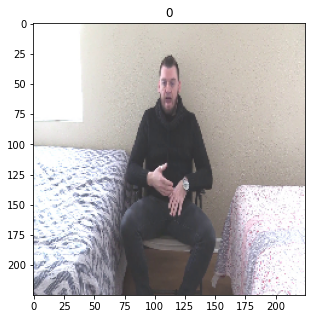

In [4]:
#test img train
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, '0')

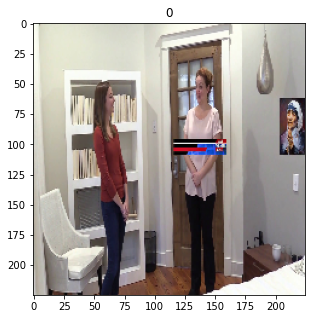

In [6]:
#test img test
plt.figure(figsize = (5,5))
plt.imshow(val[-1][0])
plt.title(labels[val[0][1]])

In [7]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalizzazione
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [9]:
#modello di prova senza LSTM
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(225,225,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [10]:
#ottimizzazione con Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Train on 1300 samples, validate on 1301 samples
Epoch 1/10
1300/1300 [==============================] - 200s 154ms/step - loss: 0.6694 - accuracy: 0.9438 - val_loss: 0.6999 - val_accuracy: 1.0000
Epoch 2/10
1300/1300 [==============================] - 200s 154ms/step - loss: 0.6451 - accuracy: 1.0000 - val_loss: 0.7132 - val_accuracy: 1.0000
Epoch 3/10
1300/1300 [==============================] - 199s 153ms/step - loss: 0.6305 - accuracy: 1.0000 - val_loss: 0.7236 - val_accuracy: 1.0000
Epoch 4/10
1300/1300 [==============================] - 199s 153ms/step - loss: 0.6242 - accuracy: 1.0000 - val_loss: 0.7296 - val_accuracy: 1.0000
Epoch 5/10
1300/1300 [==============================] - 199s 153ms/step - loss: 0.6196 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 1.0000
Epoch 6/10
1300/1300 [==============================] - 199s 153ms/step - loss: 0.6165 - accuracy: 1.0000 - val_loss: 0.7382 - val_accuracy: 1.0000
Epoch 7/10
1300/1300 [==============================] - 198s 152

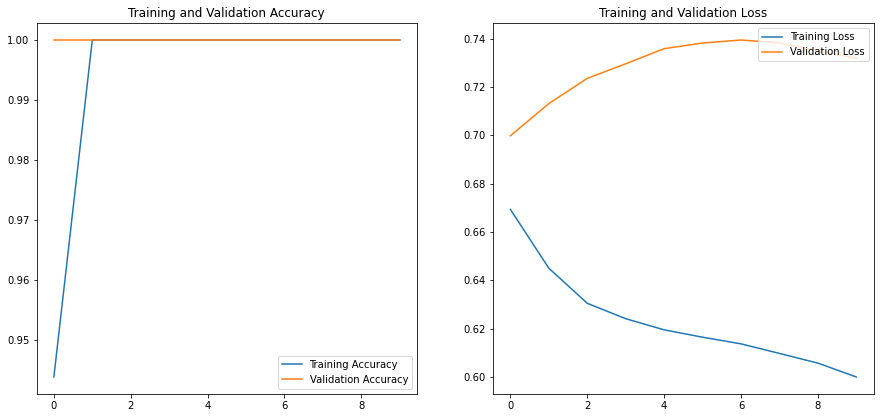

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()